# Part 5: Clustering basics

## We've looked at regression and classification. These are both types of supervised machine learning. In supervised learning, you train an algorithm to predict an unknown variable from known variables.

## Unsupervised learning, in unsupervised learning, we aren't trying to predict anything, instead, we're finding patterns in data.

## One of the main unsupervised learning technique is called clustering.

## Clustering algorithms group similar rows together.

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
votes = pd.read_csv('114_congress.csv')
votes.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [3]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    100 non-null    object 
 1   party   100 non-null    object 
 2   state   100 non-null    object 
 3   00001   100 non-null    float64
 4   00004   100 non-null    float64
 5   00005   100 non-null    float64
 6   00006   100 non-null    float64
 7   00007   100 non-null    float64
 8   00008   100 non-null    float64
 9   00009   100 non-null    float64
 10  00010   100 non-null    float64
 11  00020   100 non-null    float64
 12  00026   100 non-null    float64
 13  00032   100 non-null    float64
 14  00038   100 non-null    float64
 15  00039   100 non-null    float64
 16  00044   100 non-null    float64
 17  00047   100 non-null    float64
dtypes: float64(15), object(3)
memory usage: 14.2+ KB


In [4]:
votes.party.value_counts()

R    54
D    44
I     2
Name: party, dtype: int64

In [5]:
votes.mean() > 0.5

00001    False
00004     True
00005     True
00006     True
00007     True
00008    False
00009     True
00010     True
00020     True
00026     True
00032    False
00038    False
00039     True
00044    False
00047    False
dtype: bool

## Figure out how "close" the Senators are to each other, then group together the Senators that are the closest.

## Euclidean distance $d = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2 + \cdots + (q_n - p_n)^2}$

## sklearn.metrics.pairwise.euclidean_distance()

In [6]:
from sklearn.metrics.pairwise import euclidean_distances
print(euclidean_distances(votes.iloc[0, 3:].values.reshape(1,-1), 
                         votes.iloc[1, 3:].values.reshape(1,-1)))
## -1 means unknown dimension number that get from compatible result, like 12 elements, 1,-1, -1 means 12

[[1.73205081]]


In [7]:
print(votes.iloc[0, 3:].values)
print(votes.iloc[0, 3:].values.reshape(1,-1))

[0.0 1.0 1.0 1.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0]
[[0.0 1.0 1.0 1.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0]]


In [8]:
pd.Series([1,2,3,4,5,6]).values.reshape(1,-1).shape

(1, 6)

In [9]:
distance = euclidean_distances(votes.iloc[0, 3:].values.reshape(1,-1),
                              votes.iloc[2, 3:].values.reshape(1,-1))

## k-means clustering to split the data into clusters. Each cluster is assigned a center, and the Euclidean distance from each Senator to the center is computed.

## The k-means algorithm requires us to specify the number of clusters upfront.

In [10]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2, random_state=1)
senator_distances = kmeans_model.fit_transform(votes.iloc[:, 3:])

In [11]:
senator_distances[:5]

array([[1.3134775 , 3.12141628],
       [2.05339992, 2.6146248 ],
       [3.41651746, 0.33960656],
       [0.24198446, 3.42004795],
       [2.96866004, 1.43833966]])

## Pandas, crosstab()

In [12]:
is_smoker =       [0,1,1,0,0,1]
has_lung_cancer = [1,0,1,0,1,0]
pd.crosstab(index=np.array(is_smoker), columns=np.array(has_lung_cancer))

col_0,0,1
row_0,,
0,1,2
1,2,1


In [13]:
labels = kmeans_model.labels_

In [14]:
a = KMeans(n_clusters=2, random_state=1)
a.fit_transform(votes.iloc[:, 3:])
a.labels_

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int32)

In [15]:
pd.crosstab(labels, votes['party'])

party,D,I,R
row_0,,,
0,3,0,54
1,41,2,0


In [16]:
votes[(labels==0) & (votes['party'] == 'I')]

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047


In [17]:
democratic_outliers = votes[(labels == 0) & (votes['party'] == 'D')]
democratic_outliers

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
42,Heitkamp,D,ND,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56,Manchin,D,WV,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
74,Reid,D,NV,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


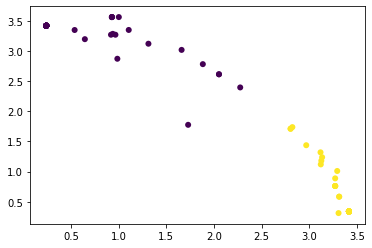

In [18]:
plt.scatter(x = senator_distances[:, 0], y=senator_distances[:, 1], c=labels, linewidths=0)
plt.show()

In [19]:
extremism = (senator_distances ** 3).sum(axis = 1)
votes['extremism'] = extremism

In [20]:
votes.sort_values(by = 'extremism', ascending = False).head(10)

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047,extremism
98,Wicker,R,MS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.250476
53,Lankford,R,OK,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
69,Paul,R,KY,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
80,Sasse,R,NE,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
26,Cruz,R,TX,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
48,Johnson,R,WI,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
47,Isakson,R,GA,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
65,Murkowski,R,AK,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
64,Moran,R,KS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
30,Enzi,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540


Clustering is a powerful way to explore data and find patterns. Unsupervised learning is very commonly used with large datasets where it isn't obvious how to start with supervised machine learning. In general, it's a good idea to try unsupervised learning to explore a dataset before trying to use supervised learning machine learning models.

#  Part 6: K-means clustering

In [21]:
nba = pd.read_csv('nba_2013.csv')
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013


### Point guards, *Assist to Turnover Ratio*

In [22]:
point_guards = nba[nba['pos'] == 'PG']

In [23]:
point_guards.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
24,D.J. Augustin,PG,26,TOT,71,9,1939,298,718,0.415,133,332,0.400602,165,386,0.427461,0.508,201,227,0.885,15,115,130,313,53,3,125,147,930,2013-2014,2013
29,Leandro Barbosa,PG,31,PHO,20,0,368,56,131,0.427,7,25,0.280000,49,106,0.462264,0.454,31,39,0.795,5,32,37,32,7,4,19,30,150,2013-2014,2013
30,Jose Barea,PG,29,MIN,79,1,1471,254,656,0.387,73,231,0.316017,181,425,0.425882,0.443,79,100,0.790,16,138,154,303,26,0,125,129,660,2013-2014,2013
38,Jerryd Bayless,PG,25,TOT,72,19,1686,248,617,0.402,76,212,0.358491,172,405,0.424691,0.464,94,118,0.797,22,123,145,194,60,9,82,161,666,2013-2014,2013
50,Steve Blake,PG,33,TOT,55,28,1498,133,353,0.377,79,210,0.376190,54,143,0.377622,0.489,33,43,0.767,13,146,159,307,54,8,102,85,378,2013-2014,2013


In [24]:
point_guards['ppg'] = point_guards['pts'] / point_guards['g']
point_guards[['pts', 'g', 'ppg']].head()

/home/ning/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,pts,g,ppg
24,930,71,13.098592
29,150,20,7.500000
30,660,79,8.354430
38,666,72,9.250000
50,378,55,6.872727


In [25]:
point_guards = point_guards[point_guards['tov'] != 0]
point_guards['tov'].isnull().sum()

0

In [26]:
point_guards['atr'] = point_guards['ast'] / point_guards['tov']
point_guards.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end,ppg,atr
24,D.J. Augustin,PG,26,TOT,71,9,1939,298,718,0.415,133,332,0.400602,165,386,0.427461,0.508,201,227,0.885,15,115,130,313,53,3,125,147,930,2013-2014,2013,13.098592,2.504000
29,Leandro Barbosa,PG,31,PHO,20,0,368,56,131,0.427,7,25,0.280000,49,106,0.462264,0.454,31,39,0.795,5,32,37,32,7,4,19,30,150,2013-2014,2013,7.500000,1.684211
30,Jose Barea,PG,29,MIN,79,1,1471,254,656,0.387,73,231,0.316017,181,425,0.425882,0.443,79,100,0.790,16,138,154,303,26,0,125,129,660,2013-2014,2013,8.354430,2.424000
38,Jerryd Bayless,PG,25,TOT,72,19,1686,248,617,0.402,76,212,0.358491,172,405,0.424691,0.464,94,118,0.797,22,123,145,194,60,9,82,161,666,2013-2014,2013,9.250000,2.365854
50,Steve Blake,PG,33,TOT,55,28,1498,133,353,0.377,79,210,0.376190,54,143,0.377622,0.489,33,43,0.767,13,146,159,307,54,8,102,85,378,2013-2014,2013,6.872727,3.009804


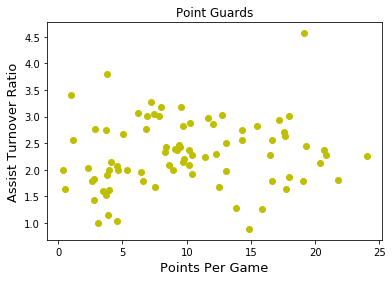

In [27]:
plt.scatter(point_guards['ppg'], point_guards['atr'], c='y')
plt.title('Point Guards')
plt.xlabel('Points Per Game', fontsize = 13)
plt.ylabel('Assist Turnover Ratio', fontsize= 13)
plt.show()

## Centroid based clustering, centroid based clustering works well when the clusters resemble circles with centers (or centroid). The centroid represent the arithmetic mean of all of the data points in that cluster.

## K-Means Clustering is a popular centroid-based clustering algorithm.

In [28]:
num_clusters = 5
## Use numpy's random function to generate a list, length: num_clusters of indices
random_initial_points = np.random.choice(point_guards.index, size = num_clusters)
## Use the random indices to create the centroids
centroids = point_guards.loc[random_initial_points]
centroids

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end,ppg,atr
347,Chris Paul,PG,28,LAC,62,62,2171,406,870,0.467,78,212,0.367925,328,658,0.498480,0.511,295,345,0.855,38,230,268,663,154,4,145,157,1185,2013-2014,2013,19.112903,4.572414
312,Darius Morris,PG,23,TOT,27,0,313,39,96,0.406,12,38,0.315789,27,58,0.465517,0.469,17,26,0.654,7,19,26,44,13,0,27,33,107,2013-2014,2013,3.962963,1.629630
371,Brian Roberts,PG,28,NOP,72,42,1667,244,581,0.420,64,178,0.359551,180,403,0.446650,0.475,125,133,0.940,17,119,136,234,43,7,95,132,677,2013-2014,2013,9.402778,2.463158
465,Louis Williams,PG,27,ATL,60,7,1445,197,493,0.400,79,231,0.341991,118,262,0.450382,0.480,152,179,0.849,10,114,124,210,45,4,92,65,625,2013-2014,2013,10.416667,2.282609
71,Trey Burke,PG,21,UTA,70,68,2262,341,897,0.380,111,336,0.330357,230,561,0.409982,0.442,102,113,0.903,37,171,208,396,42,6,131,145,895,2013-2014,2013,12.785714,3.022901


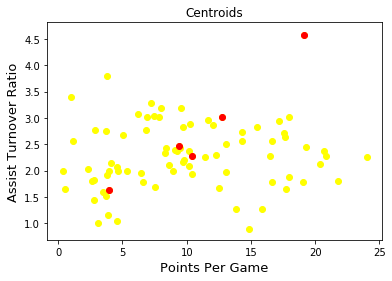

In [29]:
plt.scatter(point_guards['ppg'], point_guards['atr'], c = 'yellow')
plt.scatter(centroids['ppg'], centroids['atr'], c = 'red')
plt.title('Centroids')
plt.xlabel('Points Per Game', fontsize = 13)
plt.ylabel('Assist Turnover Ratio', fontsize = 13)
plt.show()

In [30]:
def centroids_to_dict(centroids):
    dictionary = dict()
    #iterating counter we use to generate a cluster_id
    counter = 0
    
    # iterate a pandas frame row_wise using .iterrows()
    for index, row in centroids.iterrows():
        coordinates = [row['ppg'], row['atr']]
        dictionary[counter] = coordinates
        counter += 1
        
    return dictionary

centroids_dict = centroids_to_dict(centroids)
centroids_dict

{0: [19.112903225806452, 4.572413793103448],
 1: [3.962962962962963, 1.6296296296296295],
 2: [9.402777777777779, 2.463157894736842],
 3: [10.416666666666666, 2.282608695652174],
 4: [12.785714285714286, 3.0229007633587788]}

In [31]:
import math

def calculate_distance(centroid, player_values):
    root_distance = 0
    
    for x in range(0, len(centroid)):
        difference = centroid[x] - player_values[x]
        squared_distance = difference ** 2
        root_distance += squared_distance
    
    euclid_distance = math.sqrt(root_distance)
    return euclid_distance

q = [5,2]
p = [3,1]
print(calculate_distance(q,p))

2.23606797749979


In [32]:
def assign_to_cluster(row):
    length = len(centroids_dict)
    id_distance = [(i, calculate_distance(centroids_dict[i], row[['ppg', 'atr']])) for i in range(length)]
    sorted_id_distance = sorted(id_distance, key = lambda x:x[-1])
    return sorted_id_distance[0][0]

assign_to_cluster(point_guards.iloc[1, :])

2

In [33]:
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis = 1)
point_guards.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end,ppg,atr,cluster
24,D.J. Augustin,PG,26,TOT,71,9,1939,298,718,0.415,133,332,0.400602,165,386,0.427461,0.508,201,227,0.885,15,115,130,313,53,3,125,147,930,2013-2014,2013,13.098592,2.504000,4
29,Leandro Barbosa,PG,31,PHO,20,0,368,56,131,0.427,7,25,0.280000,49,106,0.462264,0.454,31,39,0.795,5,32,37,32,7,4,19,30,150,2013-2014,2013,7.500000,1.684211,2
30,Jose Barea,PG,29,MIN,79,1,1471,254,656,0.387,73,231,0.316017,181,425,0.425882,0.443,79,100,0.790,16,138,154,303,26,0,125,129,660,2013-2014,2013,8.354430,2.424000,2
38,Jerryd Bayless,PG,25,TOT,72,19,1686,248,617,0.402,76,212,0.358491,172,405,0.424691,0.464,94,118,0.797,22,123,145,194,60,9,82,161,666,2013-2014,2013,9.250000,2.365854,2
50,Steve Blake,PG,33,TOT,55,28,1498,133,353,0.377,79,210,0.376190,54,143,0.377622,0.489,33,43,0.767,13,146,159,307,54,8,102,85,378,2013-2014,2013,6.872727,3.009804,2


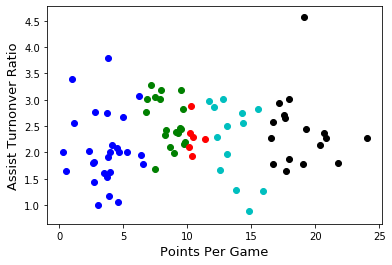

In [34]:
# Visualize clusters
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    
    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['ppg'], clustered_df['atr'], c = colors[n-1])
        plt.xlabel('Points Per Game', fontsize = 13)
        plt.ylabel('Assist Turnonver Ratio', fontsize = 13)
    plt.show()
    
visualize_clusters(point_guards, 5)

In [35]:
point_guards.cluster.value_counts()

1    27
2    19
0    17
4    13
3     6
Name: cluster, dtype: int64

In [36]:
def recalculate_centroids(df):
    new_centroids_dict = dict()
    #0..1..2..3..4
    for cluster_id in range(0, num_clusters):
        id_df = df[df['cluster'] == cluster_id]
        new_centroid = [np.average(id_df['ppg']), np.average(id_df['atr'])]
        new_centroids_dict[cluster_id] = new_centroid
    return new_centroids_dict
centroids_dict = recalculate_centroids(point_guards)

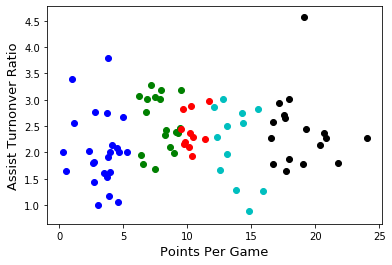

In [37]:
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis = 1)
visualize_clusters(point_guards, num_clusters)

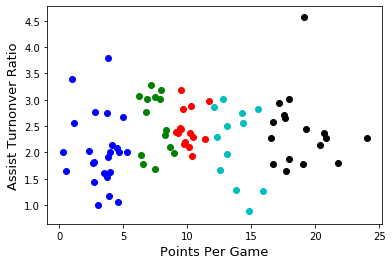

In [38]:
## Recalculate the centroids, and shift the clusters again
centroids_dict = recalculate_centroids(point_guards)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis = 1)
visualize_clusters(point_guards, num_clusters)

### If clusters look like they don't move a lot after every iteration, this means two things:
* K-Means doesn't cause massive changes in the makeup of clusters between iterations, meaning that it will always converge and become stable
* Because K-Means is conservative between iterations, where we pick the initial centroids and how we assign the players to clusters initially matters a lot

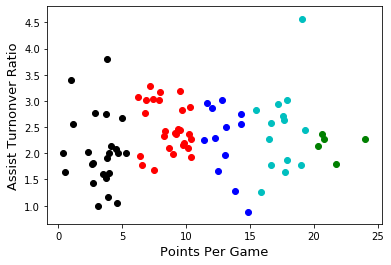

In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(point_guards[['ppg', 'atr']])
point_guards['cluster'] = kmeans.labels_

visualize_clusters(point_guards, num_clusters)

In [41]:
type(kmeans)

sklearn.cluster._kmeans.KMeans